# Phishing Websites Detection - Machine Learning Project

## Project Information

**Team Members:** Paul ARTISI, Killian BEGU, Aboubakar BAOUCHI 
**GitHub repo :** https://github.com/Popole94/Projet_Machine_Learning


---

# Part 1: Exploratory Data Analysis

## 1.1 Dataset Overview

We import all necessary libraries for data handling, visualization, preprocessing, and machine learning.
We then retrieve the Phising Websites dataset, and we separate the features (x) and the target labels (y), which will later be used for trainning and evaluating classification model that detects phising websites.

In [ ]:
# Import libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
phishing_websites = fetch_ucirepo(id=327)
X = phishing_websites.data.features
y = phishing_websites.data.targets

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (11055, 30)
Target shape: (11055, 1)


In [2]:
# Display first rows
print("First 5 rows of features:")
display(X.head())

print("\nTarget values:")
display(y.head())

First 5 rows of features:


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1



Target values:


,result
0,-1
1,-1
2,-1
3,-1
4,1


In [3]:
# Dataset info
print("Missing values:", X.isna().sum().sum())
print("\nDescriptive statistics:")
display(X.describe())

Missing values: 0

Descriptive statistics:


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.2 Target Distribution & Class Balance

Class distribution:
label
-1    4898
 1    6157
Name: count, dtype: int64

Percentages:
label
-1    44.305744
 1    55.694256
Name: proportion, dtype: float64


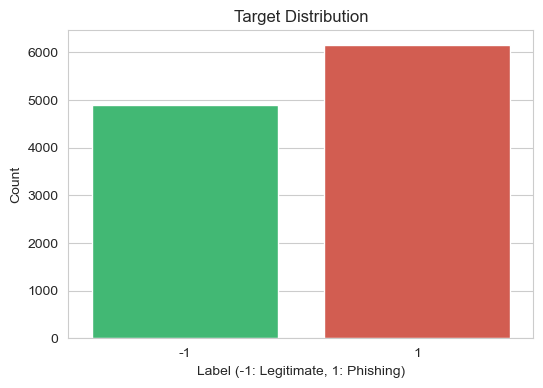

In [4]:
# Target distribution
y_series = pd.Series(y.values.ravel(), name='label')

print("Class distribution:")
print(y_series.value_counts().sort_index())

print("\nPercentages:")
print(y_series.value_counts(normalize=True).sort_index() * 100)

# Visualize
plt.figure(figsize=(6, 4))
sns.countplot(x=y_series, palette=['#2ecc71', '#e74c3c'])
plt.title('Target Distribution')
plt.xlabel('Label (-1: Legitimate, 1: Phishing)')
plt.ylabel('Count')
plt.show()

## 1.3 Correlation Analysis

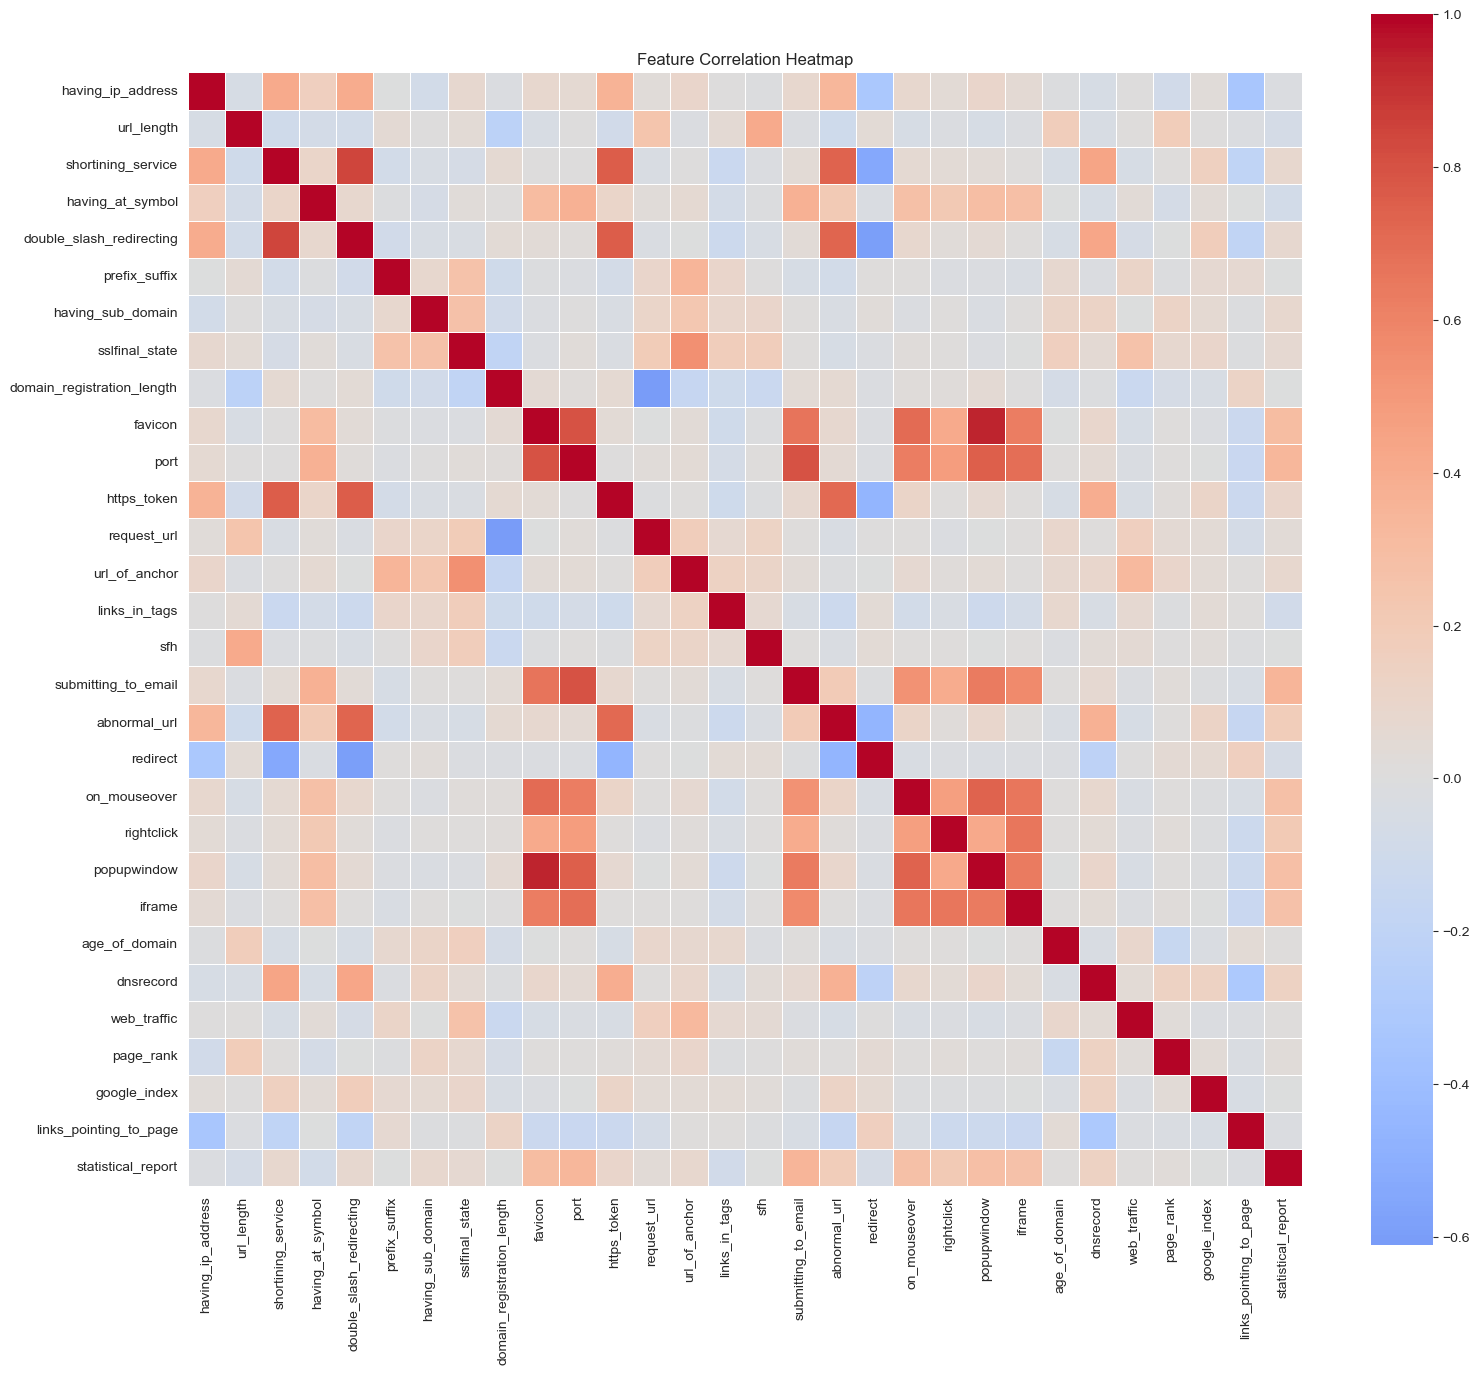

In [5]:
# Correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## 1.4 Duplicate Analysis

This section analyzes duplicate rows in the phishing websites dataset.
Important note on duplicates:
This dataset uses discrete features with values limited to {-1, 0, 1}, representing boolean properties of websites (for example: presence of IP address, SSL state, etc.). With 30 binary or ternary features, the number of unique possible combinations is naturally limited.
As a result, a high duplicate rate (>70%) is expected and normal for this dataset. Phishing websites often share the same technical signatures, so many rows will have identical feature values.
What matters to check:
1. Labeling conflicts (same features, different targets) - indicates a real problem
2. Class distribution (balance between phishing and legitimate sites)
3. Overall data consistency


In [6]:
# Duplicate analysis
data_complete = pd.concat([X, y], axis=1)

# Complete duplicates
complete_duplicates = data_complete.duplicated(keep=False).sum()
print(f"Complete duplicates: {complete_duplicates} ({complete_duplicates/len(data_complete)*100:.1f}%)")

# Feature duplicates
feature_duplicates = X.duplicated(keep=False).sum()
unique_combinations = X.drop_duplicates().shape[0]
print(f"Feature duplicates: {feature_duplicates} ({feature_duplicates/len(X)*100:.1f}%)")
print(f"Unique feature combinations: {unique_combinations}")

# Labeling conflicts
conflicts = 0
conflict_rows = 0

for _, features in X[X.duplicated(keep=False)].drop_duplicates().iterrows():
    mask = (X == features).all(axis=1)
    labels = y.loc[mask].iloc[:, 0].unique()
    if len(labels) > 1:
        conflicts += 1
        conflict_rows += mask.sum()

print(f"\nLabeling conflicts: {conflicts} groups, {conflict_rows} samples ({conflict_rows/len(X)*100:.2f}%)")

Complete duplicates: 7843 (70.9%)
Feature duplicates: 7884 (71.3%)
Unique feature combinations: 5785

Labeling conflicts: 64 groups, 357 samples (3.23%)


## 1.5 Outlier Detection

In [7]:
# Outlier detection using Isolation Forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
outlier_count = (outliers == -1).sum()

print(f"Outliers detected: {outlier_count} ({outlier_count/len(X)*100:.2f}%)")

# Outliers by class
for class_label in y.iloc[:, 0].unique():
    class_name = "Legitimate" if class_label == -1 else "Phishing"
    class_mask = y.iloc[:, 0] == class_label
    class_outliers = (outliers[class_mask] == -1).sum()
    total_class = class_mask.sum()
    print(f"{class_name}: {class_outliers} outliers ({class_outliers/total_class*100:.2f}% of class)")

Outliers detected: 553 (5.00%)
Legitimate: 353 outliers (7.21% of class)
Phishing: 200 outliers (3.25% of class)


We detected 553 outliers (5%) using Isolation Forest, which is expected since we set the contamination parameter to 0.05. These represent websites with unusual or rare feature combinations.
The dataset has good class balance with 55.7% legitimate sites and 44.3% phishing sites, giving a class imbalance ratio of 1.26:1 which is reasonable for classification tasks.
One interesting finding is that phishing sites have more outliers (7.2%) compared to legitimate sites (3.2%). This makes sense because phishing websites use a wider variety of techniques and attack methods, while legitimate sites tend to follow more standard patterns. This is actually a good sign that our dataset captures the real-world complexity of the problem.
Overall, the data is well-balanced and ready for model training without requiring special handling for class imbalance.

---

# Part 2: Feature Engineering

## 2.1 Preliminary Feature Importance


Top 15 most important features:
                       feature  importance
7               sslfinal_state    0.318529
13               url_of_anchor    0.262463
25                 web_traffic    0.070082
6            having_sub_domain    0.060848
14               links_in_tags    0.041492
5                prefix_suffix    0.038782
15                         sfh    0.020772
12                 request_url    0.019452
28      links_pointing_to_page    0.019059
8   domain_registration_length    0.016344
23               age_of_domain    0.015326
27                google_index    0.013117
0            having_ip_address    0.013011
24                   dnsrecord    0.012302
26                   page_rank    0.011816


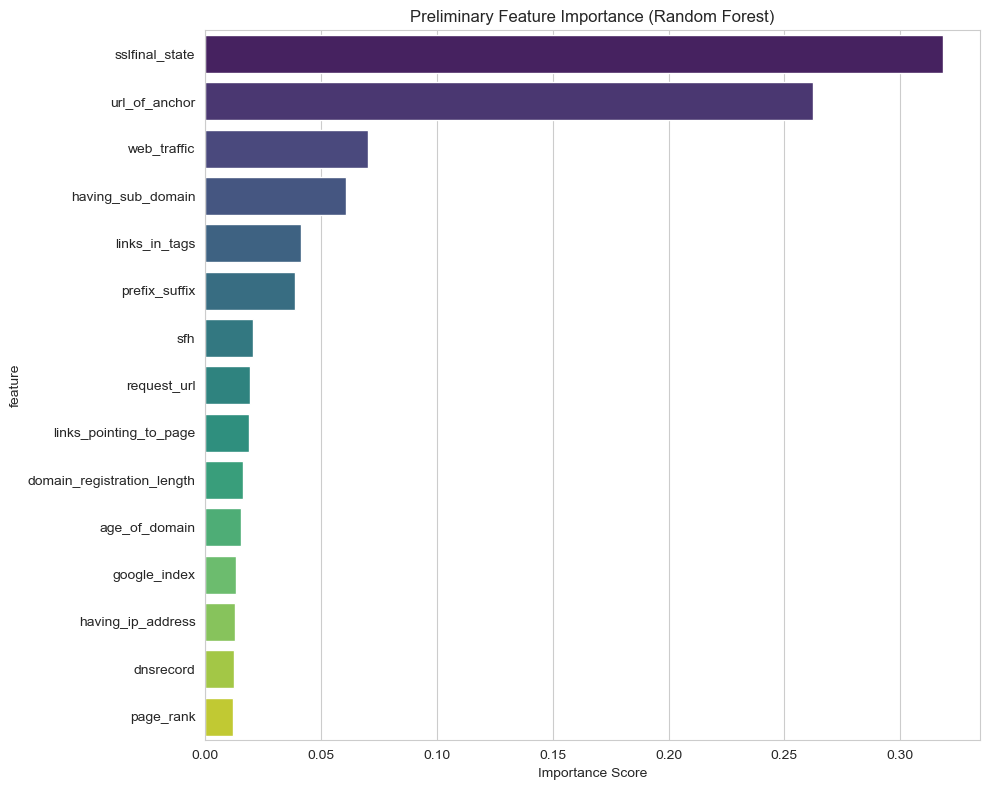

In [8]:
# Quick Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier

# Encode target temporarily
y_binary = y.replace({-1: 0, 1: 1})

# Train quick RF
rf_preliminary = RandomForestClassifier(n_estimators=100, random_state=42)
rf_preliminary.fit(X, y_binary.values.ravel())

# Feature importance
feature_importance_prelim = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_preliminary.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 most important features:")
print(feature_importance_prelim.head(15))

# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_prelim.head(15), y='feature', x='importance', palette='viridis')
plt.title('Preliminary Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

---

# Part 3: Data Preprocessing

## 3.1 Target Encoding


In [9]:
# Encode target: -1,1 to 0,1
y_binary = y.replace({-1: 0, 1: 1})
print("Target encoding: -1 (Legitimate) → 0, 1 (Phishing) → 1")
print(y_binary.value_counts().sort_index())

Target encoding: -1 (Legitimate) → 0, 1 (Phishing) → 1
result
0         4898
1         6157
Name: count, dtype: int64


This section prepares the data for model training. We perform the following trnasformations :
- Target encoding: converting labels from (-1, 1) to (0, 1) to ensure compability with standard evaluation metrics.
- Normalization: applying a standardScaler to scale the features
- Train-test split : using a stratified split to preserve class balance between training and testing sets.

## 3.2 Train-Validation-Test Split

In [10]:
# Train-Validation-Test split (60-20-20)
from sklearn.model_selection import train_test_split

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_binary, test_size=0.20, random_state=42, stratify=y_binary
)

# Second split: 75% train, 25% val (of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution:")
print(f"Train: {y_train.value_counts().sort_index().values}")
print(f"Val: {y_val.value_counts().sort_index().values}")
print(f"Test: {y_test.value_counts().sort_index().values}")

Train set: 6633 samples (60.0%)
Validation set: 2211 samples (20.0%)
Test set: 2211 samples (20.0%)

Class distribution:
Train: [2939 3694]
Val: [ 979 1232]
Test: [ 980 1231]


## 3.3 Scaling/Normalization

In [11]:
# Standardization (fit only on train)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Scaler fitted on {scaler.n_samples_seen_} training samples")
print("Validation and test sets transformed separately")

Scaler fitted on 6633 training samples
Validation and test sets transformed separately


## 3.4 Data Leakage Check

In [12]:
# Verify no data leakage
train_indices = set(X_train.index)
val_indices = set(X_val.index)
test_indices = set(X_test.index)

overlap_train_val = train_indices.intersection(val_indices)
overlap_train_test = train_indices.intersection(test_indices)
overlap_val_test = val_indices.intersection(test_indices)

print(f"Train-Val overlap: {len(overlap_train_val)} samples")
print(f"Train-Test overlap: {len(overlap_train_test)} samples")
print(f"Val-Test overlap: {len(overlap_val_test)} samples")
print(f"\nScaler samples seen: {scaler.n_samples_seen_} (should equal train size: {len(X_train)})")

Train-Val overlap: 0 samples
Train-Test overlap: 0 samples
Val-Test overlap: 0 samples

Scaler samples seen: 6633 (should equal train size: 6633)


---

# Part 4: Model Development

## 4.1 Baseline Model - Logistic Regression


In [13]:
# Baseline: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_baseline = LogisticRegression(max_iter=1000, random_state=42)
lr_baseline.fit(X_train_scaled, y_train.values.ravel())
y_pred_lr = lr_baseline.predict(X_test_scaled)

print("Baseline Model: Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Legitimate', 'Phishing']))

Baseline Model: Logistic Regression
Accuracy: 0.9290

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.93      0.90      0.92       980
    Phishing       0.92      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



## 4.2 Model Selection - Quick Comparison

In [14]:
# Compare multiple algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import time

models_comparison = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

results_comparison = {}

for name, model in models_comparison.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train.values.ravel())
    y_pred = model.predict(X_test_scaled)
    training_time = time.time() - start_time

    results_comparison[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Time (s)': training_time
    }

results_df = pd.DataFrame(results_comparison).T
print("Model Comparison:")
print(results_df.round(4))

# Select top 3 models by F1-Score
top_3_models = results_df.nlargest(3, 'F1-Score').index.tolist()
print(f"\nTop 3 models for hyperparameter tuning: {top_3_models}")

Model Comparison:
                     Accuracy  Precision  Recall  F1-Score  Time (s)
Logistic Regression    0.9290     0.9248  0.9496    0.9371    0.0243
Decision Tree          0.9634     0.9667  0.9675    0.9671    0.0117
Random Forest          0.9738     0.9696  0.9838    0.9766    0.4136
Gradient Boosting      0.9552     0.9528  0.9675    0.9601    0.5499
SVM                    0.9489     0.9402  0.9699    0.9548    1.9734
KNN                    0.9439     0.9424  0.9578    0.9500    0.3772

Top 3 models for hyperparameter tuning: ['Random Forest', 'Decision Tree', 'Gradient Boosting']


## 4.3 GridSearchCV Hyperparameter Tuning

In [15]:
# GridSearchCV for top models
from sklearn.model_selection import GridSearchCV

# Combine train + val for GridSearch
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
X_train_val_scaled = scaler.fit_transform(X_train_val)

# Define parameter grids
param_grids = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 20, 30, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced', None]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [20, 30, None],
            'min_samples_split': [2, 5],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Run GridSearchCV
grid_results = {}

for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\nTuning {model_name}...")

        grid = GridSearchCV(
            param_grids[model_name]['model'],
            param_grids[model_name]['params'],
            scoring='f1',
            cv=5,
            n_jobs=-1,
            verbose=0
        )

        grid.fit(X_train_val_scaled, y_train_val.values.ravel())

        grid_results[model_name] = {
            'best_params': grid.best_params_,
            'best_score': grid.best_score_,
            'best_estimator': grid.best_estimator_
        }

        print(f"Best params: {grid.best_params_}")
        print(f"Best CV F1-score: {grid.best_score_:.4f}")

# Select best model overall
best_model_name = max(grid_results, key=lambda k: grid_results[k]['best_score'])
best_model = grid_results[best_model_name]['best_estimator']

print(f"\nBest model overall: {best_model_name}")
print(f"Best CV F1-score: {grid_results[best_model_name]['best_score']:.4f}")


Tuning Random Forest...
Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best CV F1-score: 0.9729

Tuning Decision Tree...
Best params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV F1-score: 0.9640

Tuning Gradient Boosting...
Best params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best CV F1-score: 0.9728

Best model overall: Random Forest
Best CV F1-score: 0.9729


## 4.4 Model Complexity Analysis

In [16]:
# Model complexity comparison
import sys
import pickle

complexity_data = []

for model_name, result in grid_results.items():
    model = result['best_estimator']

    # Model size
    model_size = sys.getsizeof(pickle.dumps(model)) / 1024  # KB

    # Inference time
    start = time.time()
    _ = model.predict(X_test_scaled[:1000])
    inference_time = (time.time() - start) / 1000 * 1000  # ms per sample

    # Complexity metric
    if hasattr(model, 'tree_'):
        complexity = model.tree_.node_count
    elif hasattr(model, 'n_estimators'):
        complexity = model.n_estimators
    else:
        complexity = 0

    complexity_data.append({
        'Model': model_name,
        'Size (KB)': model_size,
        'Inference (ms)': inference_time,
        'Complexity': complexity,
        'F1-Score': result['best_score']
    })

complexity_df = pd.DataFrame(complexity_data)
print(complexity_df.round(3))

               Model  Size (KB)  Inference (ms)  Complexity  F1-Score
0      Random Forest  19909.165           0.032         200     0.973
1      Decision Tree     73.396           0.000         925     0.964
2  Gradient Boosting    927.034           0.000         200     0.973


---

# Part 5: Model Evaluation

## 5.1 Test Set Performance


In [17]:
# Evaluate best model on test set
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

print(f"Final Model: {best_model_name}")
print(f"\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Legitimate', 'Phishing']))

Final Model: Random Forest

Test Set Performance:
Accuracy: 0.9751
Precision: 0.9719
Recall: 0.9838
F1-Score: 0.9778
ROC-AUC: 0.9979

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.98      0.96      0.97       980
    Phishing       0.97      0.98      0.98      1231

    accuracy                           0.98      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.98      0.98      0.98      2211



## 5.2 Confusion Matrix

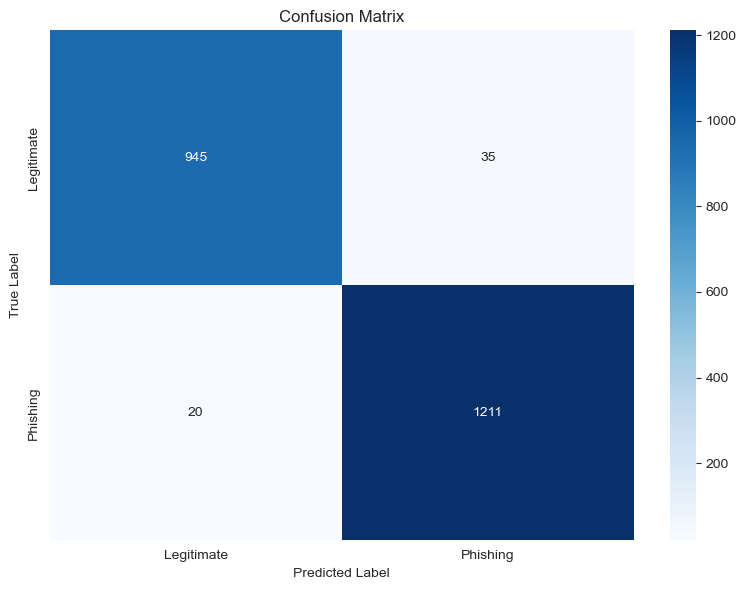

True Negatives: 945
False Positives: 35
False Negatives: 20
True Positives: 1211

False Positive Rate: 3.57%
False Negative Rate: 1.62%


In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'], ax=ax)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Breakdown
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"\nFalse Positive Rate: {fp/(fp+tn)*100:.2f}%")
print(f"False Negative Rate: {fn/(fn+tp)*100:.2f}%")

## 5.3 ROC Curve

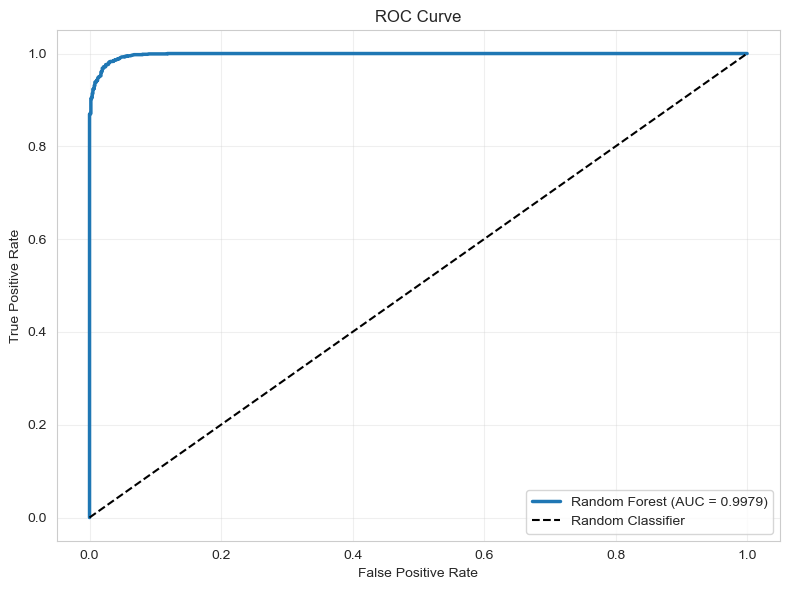

In [19]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.4f})', linewidth=2.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 5.4 Precision-Recall Curve

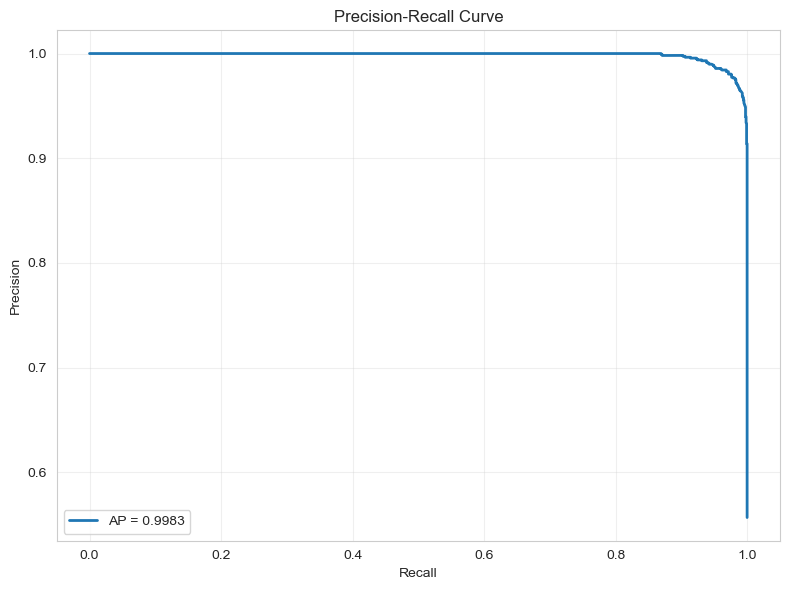

For 95.0% recall:
  Threshold: 0.000
  Precision: 0.557


In [20]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_best)
ap_score = average_precision_score(y_test, y_pred_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, linewidth=2, label=f'AP = {ap_score:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Find threshold for 95% recall
target_recall = 0.95
idx = np.where(recall_curve >= target_recall)[0]
if len(idx) > 0:
    idx = idx[0]
    threshold_95 = thresholds_pr[idx]
    precision_95 = precision_curve[idx]
    print(f"For {target_recall*100}% recall:")
    print(f"  Threshold: {threshold_95:.3f}")
    print(f"  Precision: {precision_95:.3f}")

## 5.5 Feature Importance

Top 15 most important features:
                       feature  importance
7               sslfinal_state    0.332113
13               url_of_anchor    0.249281
25                 web_traffic    0.070083
6            having_sub_domain    0.062032
14               links_in_tags    0.041716
5                prefix_suffix    0.040897
15                         sfh    0.019111
28      links_pointing_to_page    0.019098
12                 request_url    0.018271
8   domain_registration_length    0.016203
23               age_of_domain    0.015294
0            having_ip_address    0.012523
27                google_index    0.012461
24                   dnsrecord    0.012304
26                   page_rank    0.011066


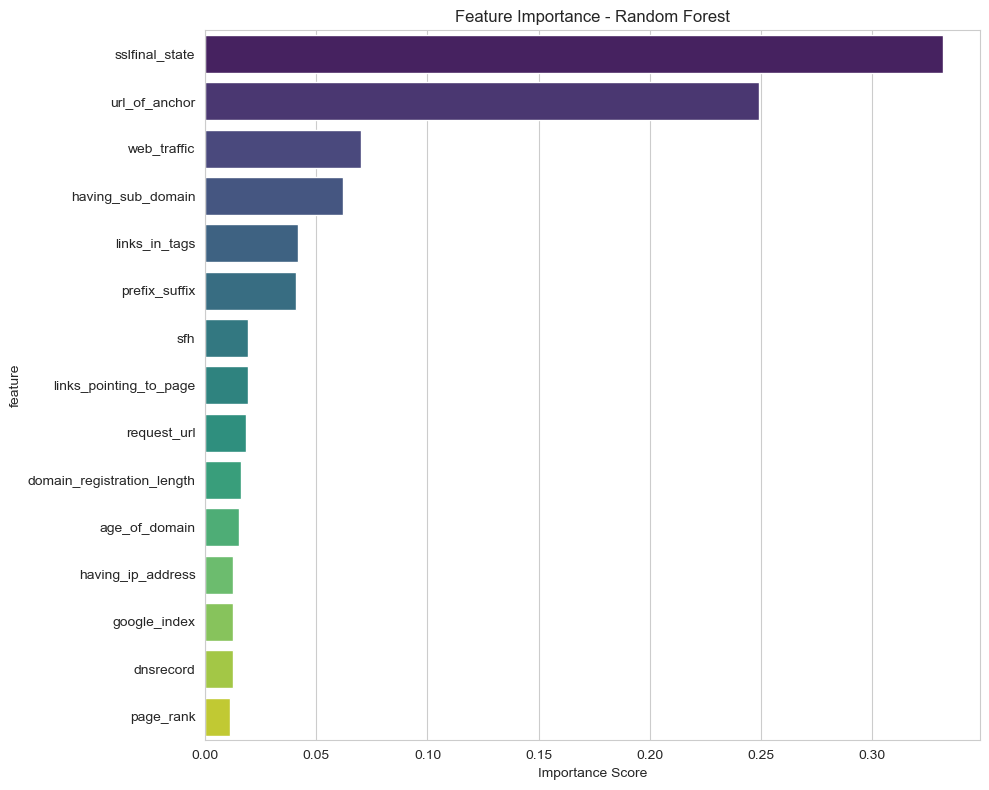


Least important features:
                     feature  importance
4   double_slash_redirecting    0.003930
19              on_mouseover    0.003329
22                    iframe    0.002423
10                      port    0.002373
20                rightclick    0.001385


In [21]:
# Feature importance from best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance_final = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 15 most important features:")
    print(feature_importance_final.head(15))

    # Visualize
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance_final.head(15), y='feature', x='importance', palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

    print("\nLeast important features:")
    print(feature_importance_final.tail(5))
else:
    print(f"{best_model_name} does not provide feature importances")

## 5.6 Error Analysis

In [22]:
# Analyze misclassified samples
# Convert to numpy arrays for proper comparison
y_test_array = y_test.values.ravel()
y_pred_array = y_pred_best

errors_mask = y_pred_array != y_test_array
X_errors = X_test[errors_mask]
y_errors_true = y_test[errors_mask]

print(f"Total errors: {errors_mask.sum()} ({errors_mask.sum()/len(y_test)*100:.2f}%)")

# False Negatives (missed phishing)
fn_mask = (y_test_array == 1) & (y_pred_array == 0)
print(f"\nFalse Negatives (missed phishing): {fn_mask.sum()}")

# False Positives (blocked legitimate)
fp_mask = (y_test_array == 0) & (y_pred_array == 1)
print(f"False Positives (blocked legitimate): {fp_mask.sum()}")

# Show sample of errors
if fn_mask.sum() > 0:
    print("\nSample of False Negatives (first 3):")
    display(X_test[fn_mask].head(3))
else:
    print("\nNo False Negatives detected!")

if fp_mask.sum() > 0:
    print("\nSample of False Positives (first 3):")
    display(X_test[fp_mask].head(3))
else:
    print("\nNo False Positives detected!")

Total errors: 55 (2.49%)

False Negatives (missed phishing): 20
False Positives (blocked legitimate): 35

Sample of False Negatives (first 3):


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
6869,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,-1,1,0,-1,1,0,1
6125,1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,1,-1,1,0,1
427,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,1,1,-1,1,-1,1,1,1



Sample of False Positives (first 3):


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
3527,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,1,1,-1,1,0,1
1415,1,-1,1,1,1,-1,1,1,1,1,...,1,1,1,1,-1,0,-1,1,1,1
10304,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,0,1


## 5.7 Overfitting Check

Train vs Test Performance:
           Training    Test  Difference
Accuracy     0.9902  0.9751      0.0150
Precision    0.9889  0.9719      0.0170
Recall       0.9935  0.9838      0.0098
F1-Score     0.9912  0.9778      0.0134


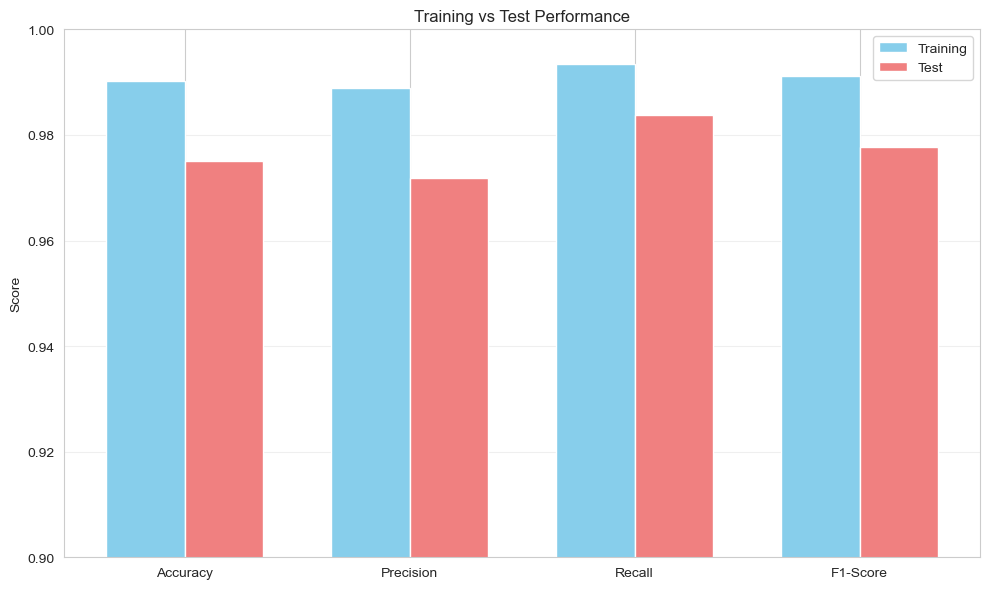

In [23]:
# Train vs Test performance comparison
y_train_pred = best_model.predict(X_train_val_scaled)

train_metrics = {
    'Accuracy': accuracy_score(y_train_val, y_train_pred),
    'Precision': precision_score(y_train_val, y_train_pred),
    'Recall': recall_score(y_train_val, y_train_pred),
    'F1-Score': f1_score(y_train_val, y_train_pred)
}

test_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best),
    'Recall': recall_score(y_test, y_pred_best),
    'F1-Score': f1_score(y_test, y_pred_best)
}

# Create DataFrame properly
comparison_overfitting = pd.DataFrame({
    'Training': pd.Series(train_metrics),
    'Test': pd.Series(test_metrics)
})
comparison_overfitting['Difference'] = comparison_overfitting['Training'] - comparison_overfitting['Test']

print("Train vs Test Performance:")
print(comparison_overfitting.round(4))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(train_metrics))
width = 0.35

ax.bar(x - width/2, list(train_metrics.values()), width, label='Training', color='skyblue')
ax.bar(x + width/2, list(test_metrics.values()), width, label='Test', color='lightcoral')
ax.set_xticks(x)
ax.set_xticklabels(train_metrics.keys())
ax.set_ylabel('Score')
ax.set_title('Training vs Test Performance')
ax.legend()
ax.set_ylim([0.9, 1.0])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5.8 Per-Class Performance

In [24]:
# Per-class metrics
report_dict = classification_report(y_test, y_pred_best, 
                                   target_names=['Legitimate', 'Phishing'],
                                   output_dict=True)

for class_name in ['Legitimate', 'Phishing']:
    print(f"{class_name}:")
    print(f"  Precision: {report_dict[class_name]['precision']:.4f}")
    print(f"  Recall: {report_dict[class_name]['recall']:.4f}")
    print(f"  F1-Score: {report_dict[class_name]['f1-score']:.4f}")
    print(f"  Support: {report_dict[class_name]['support']}")
    print()

Legitimate:
  Precision: 0.9793
  Recall: 0.9643
  F1-Score: 0.9717
  Support: 980.0

Phishing:
  Precision: 0.9719
  Recall: 0.9838
  F1-Score: 0.9778
  Support: 1231.0



---

# Part 6: Model Optimization

## 6.1 Threshold Tuning


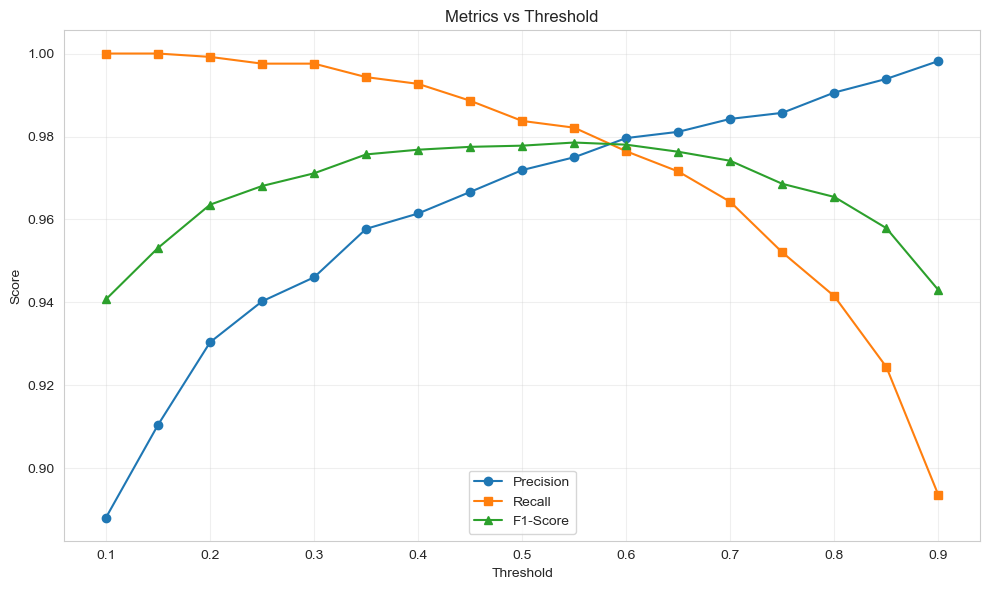

Threshold analysis:
    threshold  precision  recall      f1
0        0.10     0.8882  1.0000  0.9408
1        0.15     0.9105  1.0000  0.9532
2        0.20     0.9304  0.9992  0.9636
3        0.25     0.9403  0.9976  0.9681
4        0.30     0.9461  0.9976  0.9711
5        0.35     0.9577  0.9943  0.9757
6        0.40     0.9614  0.9927  0.9768
7        0.45     0.9666  0.9886  0.9775
8        0.50     0.9719  0.9838  0.9778
9        0.55     0.9750  0.9821  0.9786
10       0.60     0.9796  0.9764  0.9780
11       0.65     0.9811  0.9716  0.9763
12       0.70     0.9842  0.9643  0.9741
13       0.75     0.9857  0.9521  0.9686
14       0.80     0.9906  0.9415  0.9654
15       0.85     0.9939  0.9245  0.9579
16       0.90     0.9982  0.8936  0.9430


In [25]:
# Threshold tuning
thresholds_range = np.arange(0.1, 0.91, 0.05)
threshold_results = []

for thresh in thresholds_range:
    y_pred_thresh = (y_pred_proba_best >= thresh).astype(int)
    threshold_results.append({
        'threshold': thresh,
        'precision': precision_score(y_test, y_pred_thresh),
        'recall': recall_score(y_test, y_pred_thresh),
        'f1': f1_score(y_test, y_pred_thresh)
    })

threshold_df = pd.DataFrame(threshold_results)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(threshold_df['threshold'], threshold_df['precision'], label='Precision', marker='o')
ax.plot(threshold_df['threshold'], threshold_df['recall'], label='Recall', marker='s')
ax.plot(threshold_df['threshold'], threshold_df['f1'], label='F1-Score', marker='^')
ax.set_xlabel('Threshold')
ax.set_ylabel('Score')
ax.set_title('Metrics vs Threshold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Threshold analysis:")
print(threshold_df.round(4))

## 6.2 Cost-Sensitive Learning

In [26]:
# Train cost-sensitive model
from sklearn.tree import DecisionTreeClassifier

# Get best params if Decision Tree was in top models, otherwise use defaults
if 'Decision Tree' in grid_results:
    dt_params = grid_results['Decision Tree']['best_params'].copy()
    # Remove class_weight if it exists to avoid conflict
    dt_params.pop('class_weight', None)
else:
    # Use default params if Decision Tree wasn't in top 3
    dt_params = {
        'criterion': 'gini',
        'max_depth': 20,
        'min_samples_split': 2,
        'min_samples_leaf': 1
    }

# Model with class weights
dt_cost_sensitive = DecisionTreeClassifier(
    **dt_params,
    class_weight={0: 1, 1: 10},
    random_state=42
)

dt_cost_sensitive.fit(X_train_val_scaled, y_train_val.values.ravel())
y_pred_cost = dt_cost_sensitive.predict(X_test_scaled)

print("Standard model:")
print(f"  Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_best):.4f}")

print("\nCost-sensitive model (FN cost 10x FP):")
print(f"  Recall: {recall_score(y_test, y_pred_cost):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_cost):.4f}")

Standard model:
  Recall: 0.9838
  Precision: 0.9719

Cost-sensitive model (FN cost 10x FP):
  Recall: 0.9854
  Precision: 0.9581


## 6.3 Ensemble Methods

Using method from lab 6 to enhance our results.

### 6.3.1 Voting Classifier


In [27]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

# Get best models
estimators = []
for model_name, result in grid_results.items():
    estimators.append((model_name, result['best_estimator']))

# Hard voting
voting_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_hard.fit(X_train_val_scaled, y_train_val.values.ravel())
y_pred_voting_hard = voting_hard.predict(X_test_scaled)

# Soft voting
voting_soft = VotingClassifier(estimators=estimators, voting='soft')
voting_soft.fit(X_train_val_scaled, y_train_val.values.ravel())
y_pred_voting_soft = voting_soft.predict(X_test_scaled)

print("Voting Classifier Results:")
print(f"\nHard Voting:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_voting_hard):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_voting_hard):.4f}")

print(f"\nSoft Voting:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_voting_soft):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_voting_soft):.4f}")

Voting Classifier Results:

Hard Voting:
  Accuracy: 0.9765
  F1-Score: 0.9790

Soft Voting:
  Accuracy: 0.9769
  F1-Score: 0.9794


### 6.3.2 Bagging

In [28]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bagging_results = {}

for n_est in [50, 100, 200]:
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n_est,
        random_state=42
    )
    bagging.fit(X_train_val_scaled, y_train_val.values.ravel())
    y_pred_bag = bagging.predict(X_test_scaled)

    bagging_results[f'Bagging-{n_est}'] = {
        'Accuracy': accuracy_score(y_test, y_pred_bag),
        'F1-Score': f1_score(y_test, y_pred_bag),
        'Recall': recall_score(y_test, y_pred_bag)
    }

bagging_df = pd.DataFrame(bagging_results).T
print("Bagging Results:")
print(bagging_df.round(4))

Bagging Results:
             Accuracy  F1-Score  Recall
Bagging-50     0.9738    0.9766  0.9846
Bagging-100    0.9742    0.9770  0.9846
Bagging-200    0.9747    0.9774  0.9854


### 6.3.3 Stacking

In [29]:
# Stacking Classifier
from sklearn.ensemble import StackingClassifier

# Base models
base_estimators = estimators[:3]  # Top 3 models

# Meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    cv=5
)

stacking.fit(X_train_val_scaled, y_train_val.values.ravel())
y_pred_stack = stacking.predict(X_test_scaled)

print("Stacking Classifier:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_stack):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_pred_stack):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_stack):.4f}")

Stacking Classifier:
  Accuracy: 0.9765
  F1-Score: 0.9790
  Recall: 0.9862


### 6.3.4 Ensemble Comparison

Ensemble Methods Comparison:
               Accuracy  F1-Score  Recall  Precision
Random Forest    0.9751    0.9778  0.9838     0.9719
Voting (Hard)    0.9765    0.9790  0.9846     0.9735
Voting (Soft)    0.9769    0.9794  0.9862     0.9728
Stacking         0.9765    0.9790  0.9862     0.9720


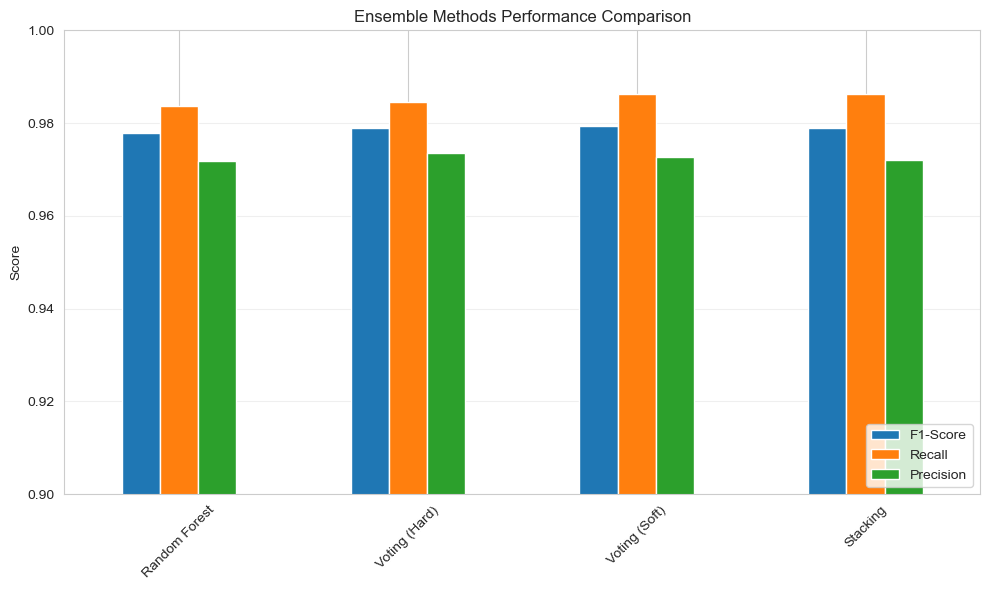

In [51]:
# Compare all ensemble methods
ensemble_comparison = {
    best_model_name: {
        'model': best_model,
        'Accuracy': accuracy_score(y_test, y_pred_best),
        'F1-Score': f1_score(y_test, y_pred_best),
        'Recall': recall_score(y_test, y_pred_best),
        'Precision': precision_score(y_test, y_pred_best)
    },
    'Voting (Hard)': {
        'model': voting_hard,
        'Accuracy': accuracy_score(y_test, y_pred_voting_hard),
        'F1-Score': f1_score(y_test, y_pred_voting_hard),
        'Recall': recall_score(y_test, y_pred_voting_hard),
        'Precision': precision_score(y_test, y_pred_voting_hard)
    },
    'Voting (Soft)': {
        'model': voting_soft,
        'Accuracy': accuracy_score(y_test, y_pred_voting_soft),
        'F1-Score': f1_score(y_test, y_pred_voting_soft),
        'Recall': recall_score(y_test, y_pred_voting_soft),
        'Precision': precision_score(y_test, y_pred_voting_soft)
    },
    'Stacking': {
        'model': stacking,
        'Accuracy': accuracy_score(y_test, y_pred_stack),
        'F1-Score': f1_score(y_test, y_pred_stack),
        'Recall': recall_score(y_test, y_pred_stack),
        'Precision': precision_score(y_test, y_pred_stack)
    }
}

metrics_only = {
    name: {k: v for k, v in data.items() if k != 'model'}
    for name, data in ensemble_comparison.items()
}

ensemble_df = pd.DataFrame(metrics_only).T
print("Ensemble Methods Comparison:")
print(ensemble_df.round(4))

# Visualize
ensemble_df[['F1-Score', 'Recall', 'Precision']].plot(kind='bar', figsize=(10, 6))
plt.title('Ensemble Methods Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 6.4 Final Model Selection

In [52]:
final_model_name = ensemble_df['F1-Score'].idxmax()
final_f1 = ensemble_df.loc[final_model_name, 'F1-Score']

print(f"Final Selected Model: {final_model_name}")
print(f"F1-Score: {final_f1:.4f}")
print(f"Recall: {ensemble_df.loc[final_model_name, 'Recall']:.4f}")
print(f"Precision: {ensemble_df.loc[final_model_name, 'Precision']:.4f}")

final_model = ensemble_comparison[final_model_name]['model']

print(f"\nFinal model object: {type(final_model).__name__}")


Final Selected Model: Voting (Soft)
F1-Score: 0.9794
Recall: 0.9862
Precision: 0.9728

Final model object: VotingClassifier


---

# Part 7: Validation & Robustness

## 7.1 Cross-Validation Analysis


In [55]:
# Cross-Validation Analysis
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    final_model, 
    X_train_val_scaled, 
    y_train_val.values.ravel(), 
    cv=5, 
    scoring='f1',
    n_jobs=-1
)


print(f"Cross-Validation Results for {final_model_name}:")
print(f"Mean F1-Score: {cv_scores.mean():.4f}")
print(f"Std F1-Score:  {cv_scores.std():.4f}")
print(f"CV Scores: {cv_scores.round(4)}")

Cross-Validation Results for Voting (Soft):
Mean F1-Score: 0.9730
Std F1-Score:  0.0037
CV Scores: [0.9685 0.9713 0.9783 0.9704 0.9763]


## 7.2 Learning Curves

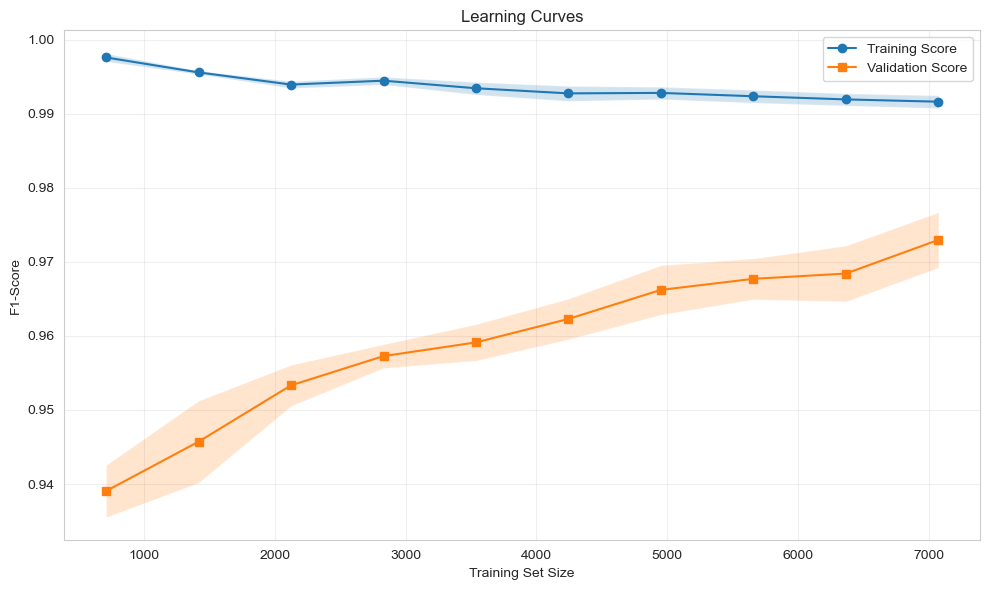

Final training score: 0.9916 ± 0.0009
Final validation score: 0.9730 ± 0.0037


In [56]:
# Learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_model, X_train_val_scaled, y_train_val.values.ravel(),
    cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score', marker='s')
plt.fill_between(train_sizes, 
                 train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.2)
plt.fill_between(train_sizes,
                 val_scores.mean(axis=1) - val_scores.std(axis=1),
                 val_scores.mean(axis=1) + val_scores.std(axis=1), alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('F1-Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_scores.mean(axis=1)[-1]:.4f} ± {train_scores.std(axis=1)[-1]:.4f}")
print(f"Final validation score: {val_scores.mean(axis=1)[-1]:.4f} ± {val_scores.std(axis=1)[-1]:.4f}")

## 7.3 Robustness Tests

In [59]:
# Noise robustness test
noise_levels = [0.1, 0.2, 0.3]
noise_results = []

for noise_std in noise_levels:
    X_test_noisy = X_test_scaled + np.random.normal(0, noise_std, X_test_scaled.shape)
    y_pred_noisy = final_model.predict(X_test_noisy)

    noise_results.append({
        'Noise Level': noise_std,
        'Accuracy': accuracy_score(y_test, y_pred_noisy),
        'F1-Score': f1_score(y_test, y_pred_noisy)
    })

noise_df = pd.DataFrame(noise_results)
print("Robustness to Noise:")
print(noise_df.round(4))

# Missing features test
missing_pct = [0.1, 0.2, 0.3]
missing_results = []

for pct in missing_pct:
    X_test_missing = X_test_scaled.copy()
    mask = np.random.rand(*X_test_missing.shape) < pct
    X_test_missing[mask] = 0

    y_pred_missing = final_model.predict(X_test_missing)

    missing_results.append({
        'Missing %': pct * 100,
        'Accuracy': accuracy_score(y_test, y_pred_missing),
        'F1-Score': f1_score(y_test, y_pred_missing)
    })

missing_df = pd.DataFrame(missing_results)
print("\nRobustness to Missing Features:")
print(missing_df.round(4))

Robustness to Noise:
   Noise Level  Accuracy  F1-Score
0          0.1    0.9769    0.9794
1          0.2    0.9765    0.9790
2          0.3    0.9625    0.9662

Robustness to Missing Features:
   Missing %  Accuracy  F1-Score
0       10.0    0.9263    0.9316
1       20.0    0.8761    0.8810
2       30.0    0.8114    0.8069


---

# Part 8: Final Results Summary


In [61]:
# Final summary
print("="*70)
print(" "*20 + "FINAL RESULTS SUMMARY")
print("="*70)

print("\nDataset:")
print(f"  Total samples: {len(X):,}")
print(f"  Features: {X.shape[1]}")
print(f"  Missing values: 0")

print(f"\nFinal Model: {final_model_name}")
print(f"  Test Accuracy: {ensemble_df.loc[final_model_name, 'Accuracy']:.4f}")
print(f"  Test F1-Score: {ensemble_df.loc[final_model_name, 'F1-Score']:.4f}")
print(f"  Test Recall: {ensemble_df.loc[final_model_name, 'Recall']:.4f}")
print(f"  Test Precision: {ensemble_df.loc[final_model_name, 'Precision']:.4f}")

if hasattr(final_model, 'feature_importances_'):
    print(f"\nTop 3 Important Features:")
    for i, (_, row) in enumerate(feature_importance_final.head(3).iterrows(), 1):
        print(f"  {i}. {row['feature']}: {row['importance']:.4f}")


                    FINAL RESULTS SUMMARY

Dataset:
  Total samples: 11,055
  Features: 30
  Missing values: 0

Final Model: Voting (Soft)
  Test Accuracy: 0.9769
  Test F1-Score: 0.9794
  Test Recall: 0.9862
  Test Precision: 0.9728
